<small>BH</small>

# The Titanic Disaster: Which factors affect survival?

**Author:** David Koyrakh
**Date:** 2024-11-17  
**Assignment:** DSC-530 Final Project

### Load the dataset and import necessary libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# Load the dataset
titanic_raw = pd.read_csv("titanic.csv")

### Explore the dataset

In [29]:
# Display the first few rows of the dataset
print(titanic_raw.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


### Clean and transform the dataset


In [30]:
# Ensure there are no missing values (there aren't any)
print(titanic_raw.isnull().sum())

# Convert categorical variables to factors
titanic_clean = titanic_raw.apply(pd.Categorical)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


##### Create the Family Size column

In [31]:
# Convert categorical variables to factors
titanic_clean = titanic_raw.apply(pd.Categorical)

# Convert 'Siblings/Spouses Aboard' and 'Parents/Children Aboard' back to integers
titanic_clean['Siblings/Spouses Aboard'] = titanic_clean['Siblings/Spouses Aboard'].astype(int)
titanic_clean['Parents/Children Aboard'] = titanic_clean['Parents/Children Aboard'].astype(int)

# Create the Family Size column out of Siblings/Spouses Aboard and Parents/Children Aboard
titanic_clean['Family Size'] = titanic_clean['Siblings/Spouses Aboard'] + titanic_clean['Parents/Children Aboard']

### Characteristics of Variables

In [32]:
# Calculate descriptive statistics for selected variables
variables = ['Age', 'Family Size', 'Fare', 'Pclass', 'Sex', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']

# Ensure 'Fare', and 'Age' are treated as numeric variables
titanic_clean['Fare'] = titanic_clean['Fare'].astype(float)
titanic_clean['Age'] = titanic_clean['Age'].astype(float)

# Display mean, mode, standard deviation, skewness, and kurtosis for numeric variables
# and mode for categorical variables
for var in variables:
    print(f"--- {var} ---")
    if titanic_clean[var].dtype.name == 'category':
        print("Mode:", titanic_clean[var].mode()[0])  # mode() returns a Series, select the first mode
    else:
        print("Mean:", titanic_clean[var].mean())
        print("Mode:", titanic_clean[var].mode()[0])
        print("Standard Deviation:", titanic_clean[var].std())
        print("Skewness:", titanic_clean[var].skew())
        print("Kurtosis:", titanic_clean[var].kurt())
    print("\n")

--- Age ---
Mean: 29.471443066516347
Mode: 22.0
Standard Deviation: 14.12190840546256
Skewness: 0.44718857190799916
Kurtosis: 0.2925590867837582


--- Family Size ---
Mean: 0.9086809470124013
Mode: 0
Standard Deviation: 1.6159487134780692
Skewness: 2.7203395947856324
Kurtosis: 9.111674795823507


--- Fare ---
Mean: 32.30542018038331
Mode: 8.05
Standard Deviation: 49.78204040017391
Skewness: 4.777671399019824
Kurtosis: 33.26460490128922


--- Pclass ---
Mode: 3


--- Sex ---
Mode: male


--- Siblings/Spouses Aboard ---
Mean: 0.5253664036076663
Mode: 0
Standard Deviation: 1.10466855386757
Skewness: 3.6867597596973
Kurtosis: 17.797537149719055


--- Parents/Children Aboard ---
Mean: 0.3833145434047351
Mode: 0
Standard Deviation: 0.8074659070316833
Skewness: 2.74119806158299
Kurtosis: 9.72306591995913




#### PMF of Passenger Class in the Survived and Not Survived Scenarios

C:\Users\David\AppData\Local\Temp\ipykernel_14792\1935001782.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
C:\Users\David\AppData\Local\Temp\ipykernel_14792\1935001782.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


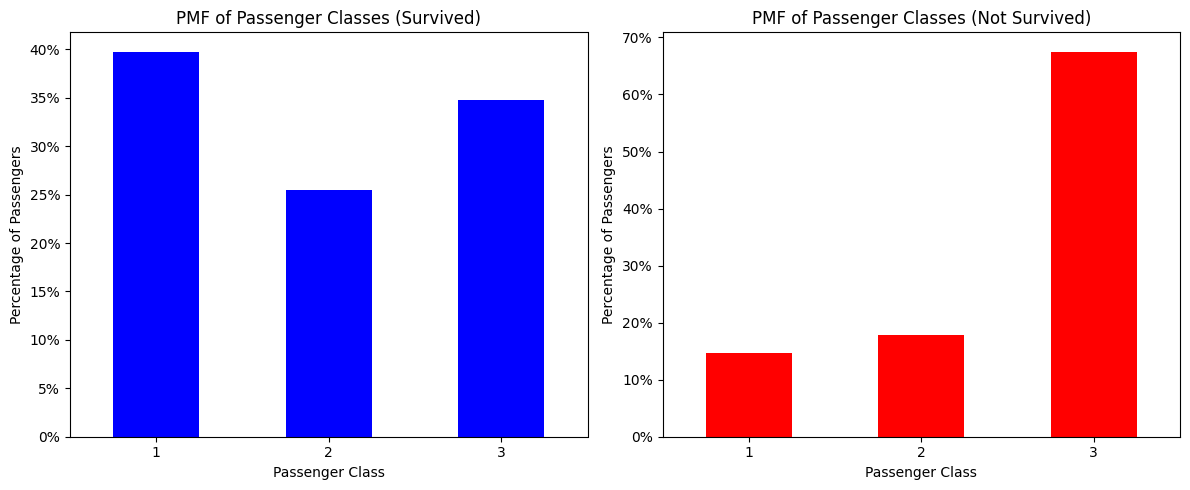

In [33]:
# Calculate the PMF for Pclass for survived and not survived scenarios
survived_pclass_counts = titanic_clean[titanic_clean['Survived'] == 1]['Pclass'].value_counts(normalize=True)
not_survived_pclass_counts = titanic_clean[titanic_clean['Survived'] == 0]['Pclass'].value_counts(normalize=True)

# Plot the PMF for survived
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
survived_pclass_counts.sort_index().plot(kind='bar', color='blue')
plt.title('PMF of Passenger Classes (Survived)')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage of Passengers')
plt.xticks(rotation=0)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

# Plot the PMF for not survived
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
not_survived_pclass_counts.sort_index().plot(kind='bar', color='red')
plt.title('PMF of Passenger Classes (Not Survived)')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage of Passengers')
plt.xticks(rotation=0)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

plt.tight_layout()
plt.show()

#### CDF for Age (Survivors)

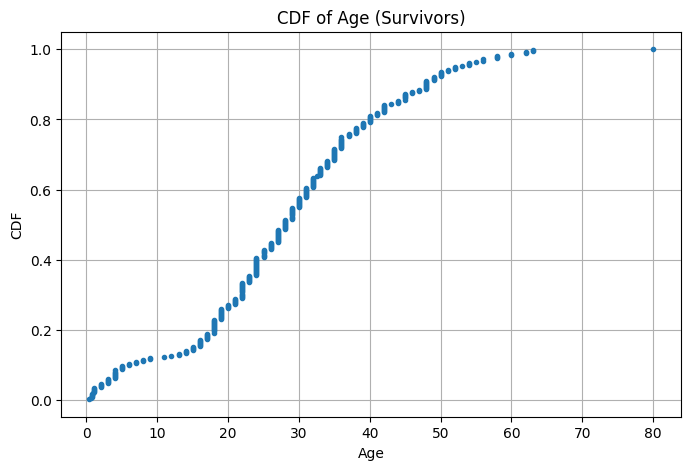

In [34]:
# Calculate the CDF for the Age variable for survivors only
age_values = np.sort(titanic_clean[titanic_clean['Survived'] == 1]['Age'].dropna())
age_cdf = np.arange(1, len(age_values)+1) / len(age_values)

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.plot(age_values, age_cdf, marker='.', linestyle='none')
plt.title('CDF of Age (Survivors)')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.grid(True)

plt.show()

#### CDF for Age (Non-Survivors)

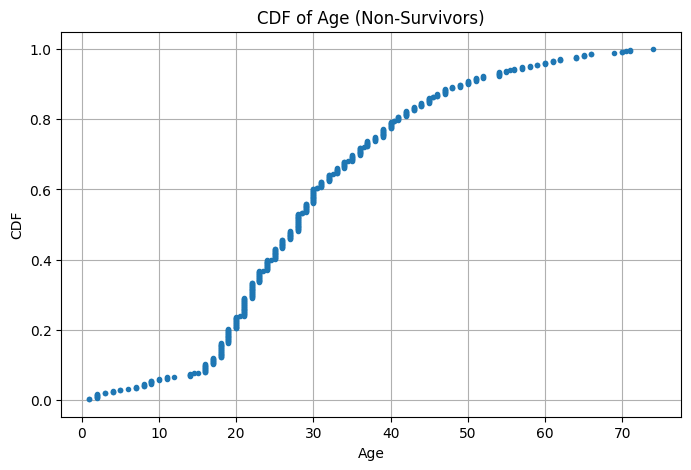

In [35]:
# Calculate the CDF for the Age variable for non-survivors only
age_values = np.sort(titanic_clean[titanic_clean['Survived'] == 0]['Age'].dropna())
age_cdf = np.arange(1, len(age_values)+1) / len(age_values)

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.plot(age_values, age_cdf, marker='.', linestyle='none')
plt.title('CDF of Age (Non-Survivors)')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.grid(True)

plt.show()

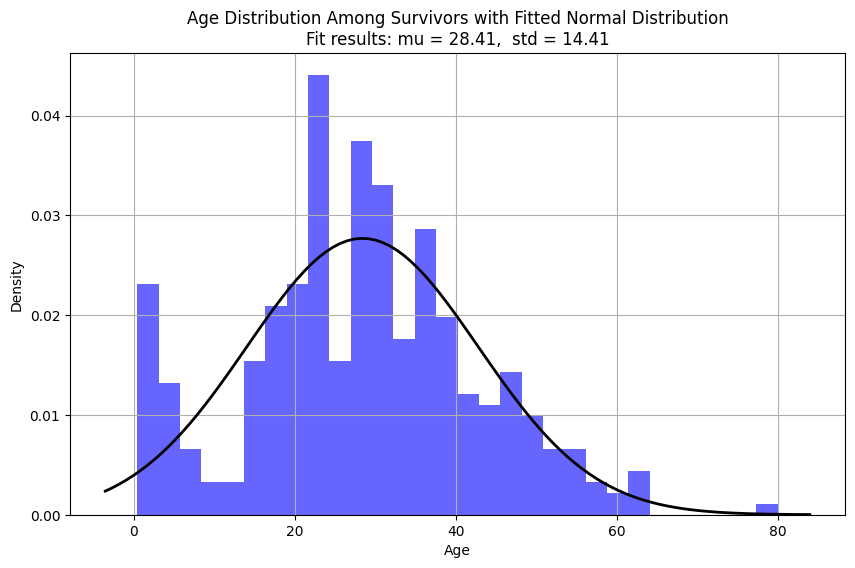

In [36]:
# Analyze the distribution of ages among survivors using a normal distribution fit
survivor_ages = titanic_clean[titanic_clean['Survived'] == 1]['Age'].dropna()

# Fit a normal distribution to the data
mu, std = stats.norm.fit(survivor_ages)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(survivor_ages, bins=30, density=True, alpha=0.6, color='b')

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title('Age Distribution Among Survivors with Fitted Normal Distribution\n' + title)
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


#### Comparison of 2 Variables 

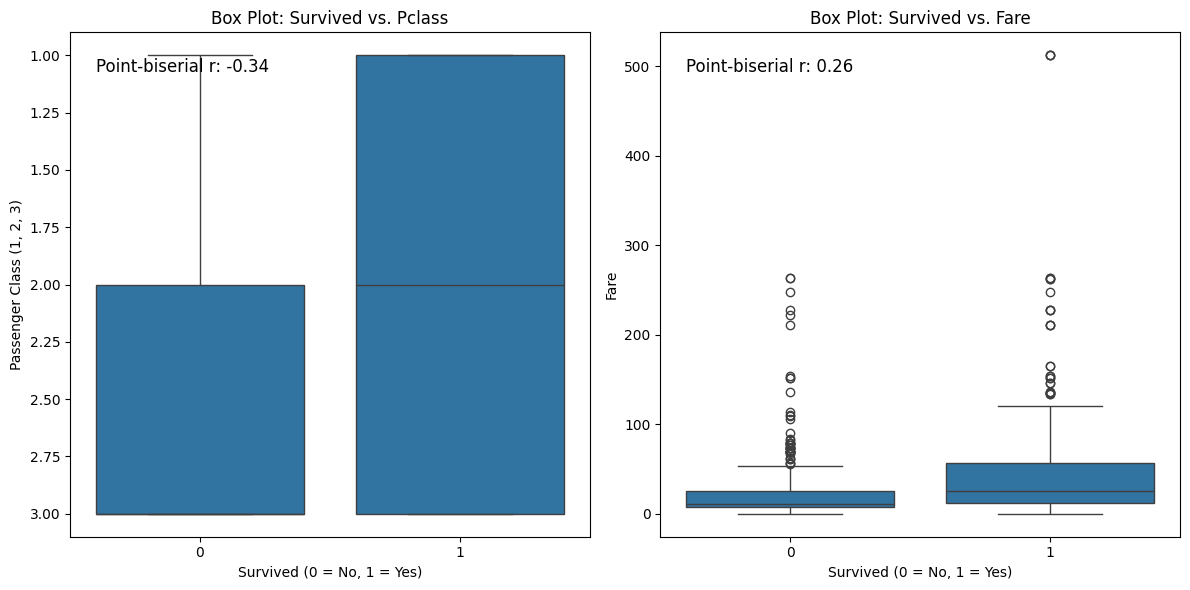

In [40]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# First plot: Box plot of Pclass vs. Survived
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x='Survived', y='Pclass', data=titanic_clean, orient='v')
plt.title('Box Plot: Survived vs. Pclass')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Class (1, 2, 3)')

# Calculate point-biserial correlation for Pclass and Survived
pclass_corr = stats.pointbiserialr(titanic_clean['Survived'], titanic_clean['Pclass']).correlation
plt.annotate(f"Point-biserial r: {pclass_corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

# Second plot: Box plot of Fare vs. Survived
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x='Survived', y='Fare', data=titanic_clean, orient='v')
plt.title('Box Plot: Survived vs. Fare')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')

# Calculate point-biserial correlation for Fare and Survived
fare_corr = stats.pointbiserialr(titanic_clean['Survived'], titanic_clean['Fare']).correlation
plt.annotate(f"Point-biserial r: {fare_corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()

#### Permutation test

In [46]:
# Hypothesis: The average fare for passengers who survived is higher than for those who did not survive.

# Separate the fares based on survival
fare_survived = titanic_clean[titanic_clean['Survived'] == 1]['Fare']
fare_not_survived = titanic_clean[titanic_clean['Survived'] == 0]['Fare']

# Define a function to compute the test statistic (difference in means)
def diff_means(data1, data2):
    return np.mean(data1) - np.mean(data2)

# Compute the observed difference in means
obs_diff = diff_means(fare_survived, fare_not_survived)

# Combine the fare data
combined_fares = np.concatenate((fare_survived, fare_not_survived))

# Initialize an array to store the permutation replicates
perm_replicates = np.empty(10000)

# Generate replicates
for i in range(10000):
    # Permute the combined data
    permuted_data = np.random.permutation(combined_fares)
    
    # Split the permuted array into two
    perm_sample_1 = permuted_data[:len(fare_survived)]
    perm_sample_2 = permuted_data[len(fare_survived):]
    
    # Compute the test statistic
    perm_replicates[i] = diff_means(perm_sample_1, perm_sample_2)

# Compute the p-value
p_value = np.sum(perm_replicates >= obs_diff) / len(perm_replicates)

# Print the result
print(f"Observed difference in means: {obs_diff}")
print(f"P-value: {p_value}")

Observed difference in means: 26.186823565641937
P-value: 0.0


##### Analysis of permutation test results

The permutation test results indicate a significant difference in the means of fares between passengers who survived and those who did not. With an observed difference of approximately 26.19 and a p-value of 0.0, we reject the null hypothesis that there is no difference in fares between the two groups. This suggests that passengers who paid higher fares had a higher likelihood of survival, which could be attributed to factors such as cabin location or access to lifeboats.

#### Regression Analysis

In [48]:
# Selecting predictors
predictors = titanic_clean[['Fare', 'Age', 'Family Size']]
predictors = sm.add_constant(predictors)

# Target variable
target = titanic_clean['Survived']

# Fit the logistic regression model
logit_model = sm.Logit(target, predictors)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.617419
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            3
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                 0.07395
Time:                        23:08:18   Log-Likelihood:                -547.65
converged:                       True   LL-Null:                       -591.38
Covariance Type:            nonrobust   LLR p-value:                 7.659e-19
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2387      0.190     -1.254      0.210      -0.612       0.134
Fare            0.0191    

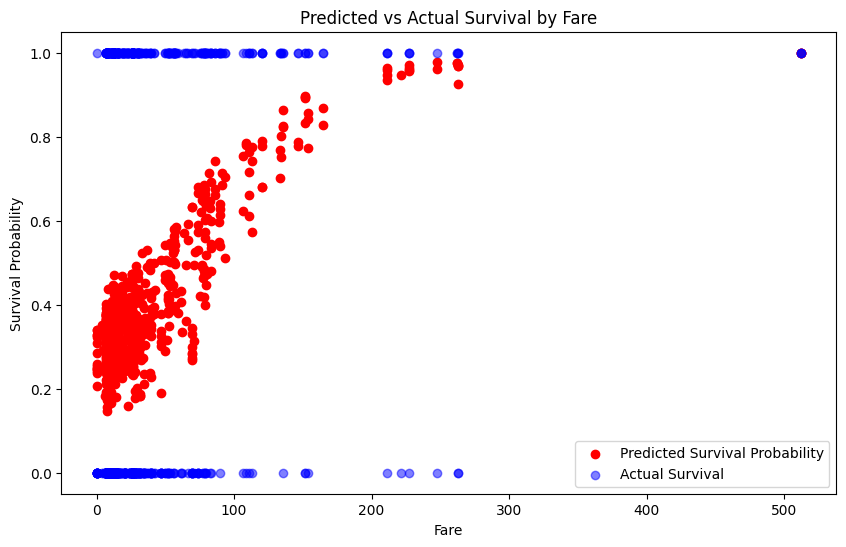

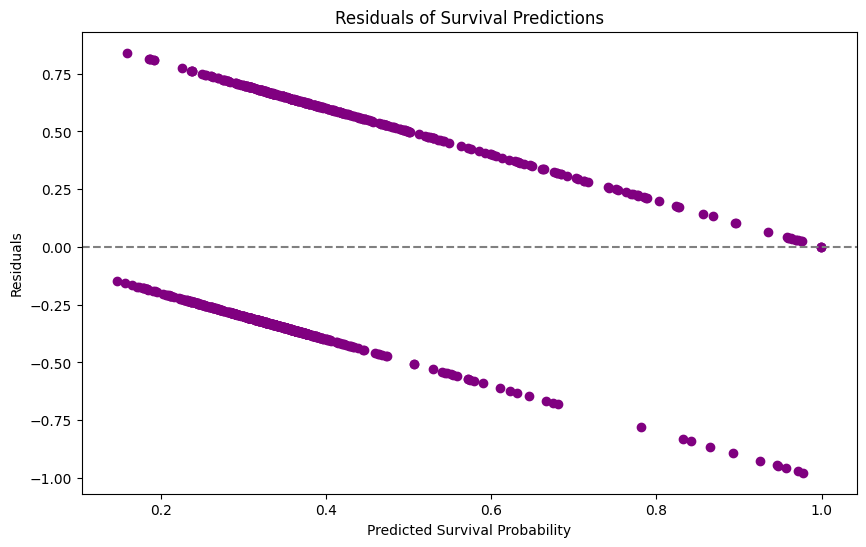

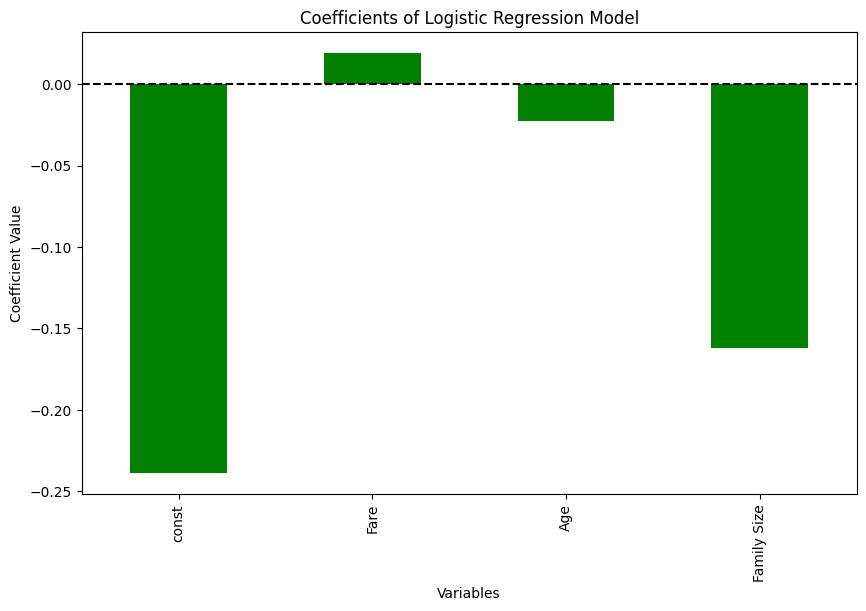

In [52]:
# Predicted vs Actual plot
plt.figure(figsize=(10, 6))
predicted_survival = result.predict(predictors)
plt.scatter(titanic_clean['Fare'], predicted_survival, color='red', label='Predicted Survival Probability')
plt.scatter(titanic_clean['Fare'], titanic_clean['Survived'].astype(int), alpha=0.5, color='blue', label='Actual Survival')
plt.title('Predicted vs Actual Survival by Fare')
plt.xlabel('Fare')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
residuals = titanic_clean['Survived'].astype(int) - predicted_survival
plt.scatter(predicted_survival, residuals, color='purple')
plt.title('Residuals of Survival Predictions')
plt.xlabel('Predicted Survival Probability')
plt.ylabel('Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

# Coefficient plot
plt.figure(figsize=(10, 6))
coef = result.params
coef.plot(kind='bar', color='green')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()